orig x_train shape: (4999, 32, 32, 3)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense) 

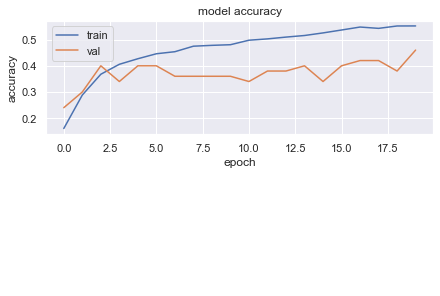

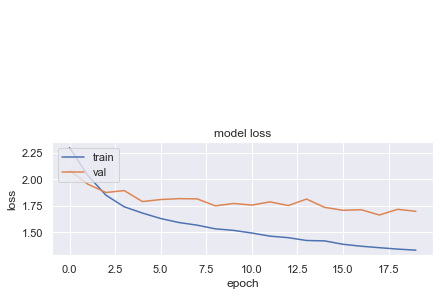

Confusion matrix for baseline model
              precision    recall  f1-score   support

           0       0.11      0.49      0.17      1000
           1       0.12      0.10      0.11      1000
           2       0.09      0.07      0.08      1000
           3       0.10      0.07      0.08      1000
           4       0.10      0.07      0.08      1000
           5       0.09      0.05      0.07      1000
           6       0.11      0.06      0.08      1000
           7       0.08      0.04      0.05      1000
           8       0.11      0.04      0.06      1000
           9       0.08      0.03      0.04      1000

    accuracy                           0.10     10000
   macro avg       0.10      0.10      0.08     10000
weighted avg       0.10      0.10      0.08     10000



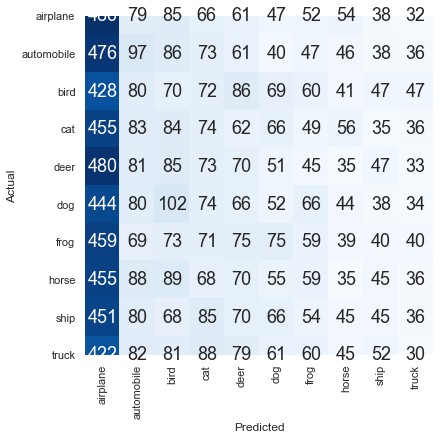

Confusion matrix for train data 
              precision    recall  f1-score   support

           0       0.64      0.59      0.61       505
           1       0.75      0.63      0.68       460
           2       0.47      0.55      0.51       519
           3       0.63      0.34      0.45       486
           4       0.54      0.48      0.51       519
           5       0.64      0.47      0.54       488
           6       0.51      0.79      0.62       518
           7       0.63      0.64      0.64       486
           8       0.64      0.77      0.70       520
           9       0.65      0.70      0.67       498

    accuracy                           0.60      4999
   macro avg       0.61      0.60      0.59      4999
weighted avg       0.61      0.60      0.59      4999



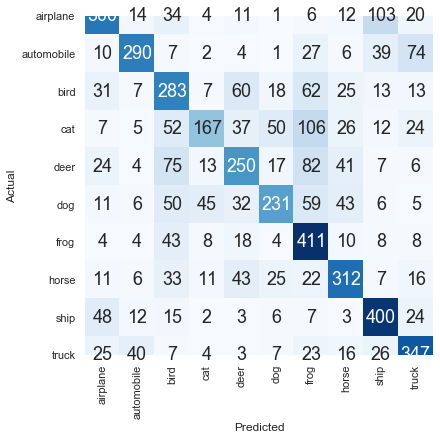

Confusion matrix for test data 
              precision    recall  f1-score   support

           0       0.58      0.55      0.56      1000
           1       0.70      0.56      0.62      1000
           2       0.37      0.46      0.41      1000
           3       0.43      0.20      0.27      1000
           4       0.44      0.40      0.42      1000
           5       0.49      0.36      0.41      1000
           6       0.46      0.73      0.57      1000
           7       0.57      0.58      0.58      1000
           8       0.56      0.71      0.63      1000
           9       0.57      0.60      0.58      1000

    accuracy                           0.52     10000
   macro avg       0.52      0.52      0.51     10000
weighted avg       0.52      0.52      0.51     10000



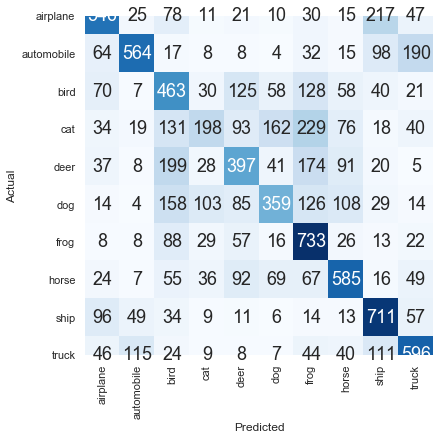

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import shuffle
import seaborn as sns; sns.set()
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
plt.rc('font', size=18)
plt.rcParams['figure.constrained_layout.use'] = True
import sys

# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
n=5000
x_train = x_train[1:n]; y_train=y_train[1:n]
#x_test=x_test[1:500]; y_test=y_test[1:500]

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print("orig x_train shape:", x_train.shape)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

use_saved_model = False
if use_saved_model:
	model = keras.models.load_model("cifar.model")
else:
	model = keras.Sequential()
	model.add(Conv2D(16, (3,3), padding='same', input_shape=x_train.shape[1:],activation='relu'))
	#model.add(Conv2D(16, (3,3),strides=(2,2), padding='same', activation='relu'))
	model.add(MaxPool2D((2, 2)))
	model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
	#model.add(Conv2D(32, (3,3),strides=(2,2), padding='same', activation='relu'))
	model.add(MaxPool2D((2, 2)))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l1(0.0001)))
	model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
	model.summary()

	batch_size = 128
	epochs = 20
	history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.01)
	model.save("cifar.model")
	plt.subplot(211)
	plt.plot(history.history['accuracy'])
	plt.plot(history.history['val_accuracy'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()
	plt.subplot(212)
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss'); plt.xlabel('epoch')
	plt.legend(['train', 'val'], loc='upper left')
	plt.show()

dummy_classifier = DummyClassifier(strategy="stratified")
dummy_classifier.fit(x_train,y_train)
print("Confusion matrix for baseline model")
b_pred = dummy_classifier.predict(x_test) 
b_pred = np.argmax(b_pred, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, b_pred))
cm1=confusion_matrix(y_test1,b_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm1, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Confusion matrix for train data ")
preds = model.predict(x_train)
y_pred = np.argmax(preds, axis=1)
y_train1 = np.argmax(y_train, axis=1)
print(classification_report(y_train1, y_pred))
cm2=confusion_matrix(y_train1,y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm2, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Confusion matrix for test data ")
preds = model.predict(x_test)
y_pred = np.argmax(preds, axis=1)
y_test1 = np.argmax(y_test, axis=1)
print(classification_report(y_test1, y_pred))
cm3=confusion_matrix(y_test1,y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm3, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()